/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

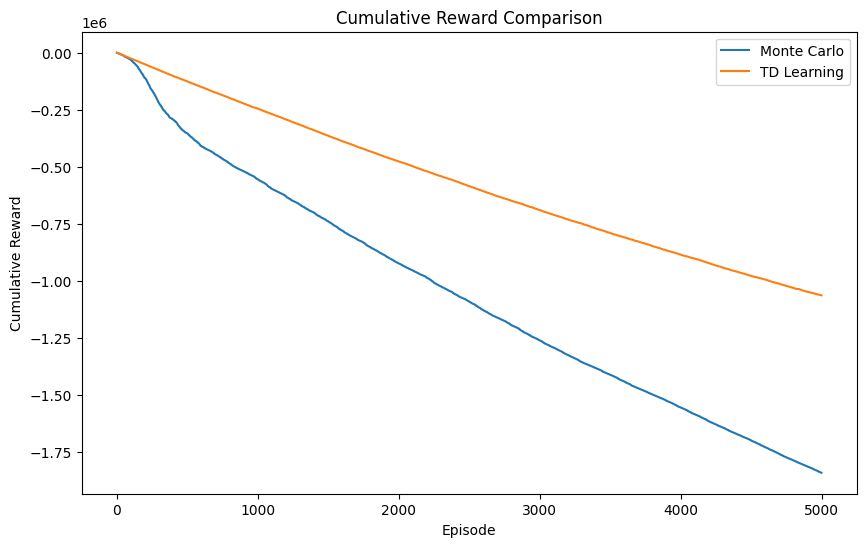

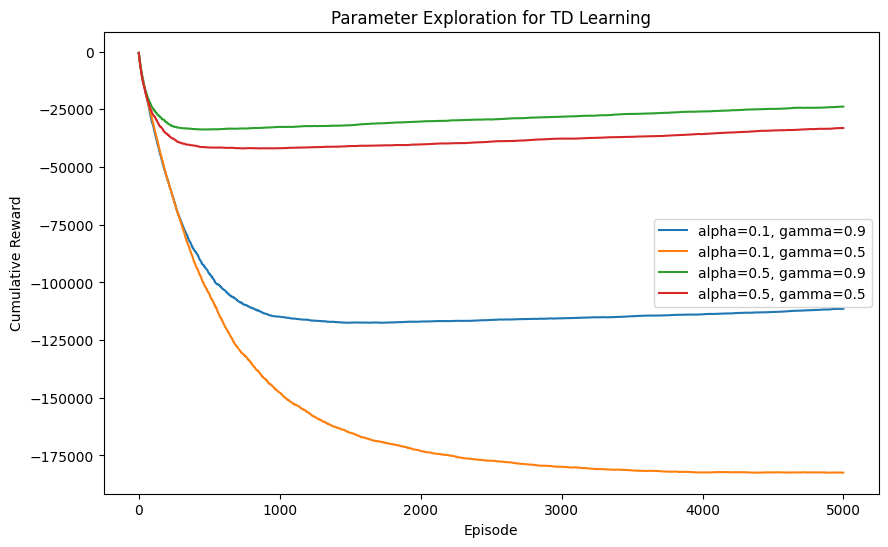

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Taxi environment
env = gym.make('Taxi-v3')
env.render()


num_episodes = 5000
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))
print(Q.shape)

# Monte Carlo algorithm
def monte_carlo():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        env.render()
        done = False
        episode_reward = 0
        episode_memory = []

        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Exploration
            else:
                action = np.argmax(Q[state])  # Exploitation

            next_state, reward, done, _ = env.step(action)
            episode_memory.append((state, action, reward))
            episode_reward += reward
            state = next_state

        rewards.append(episode_reward)

        # Updating Q-values (?)
        visited_states = set()
        for i, (state, action, reward) in enumerate(episode_memory):
            if state not in visited_states:
                visited_states.add(state)
                G = sum([r * (gamma ** i) for i, (_, _, r) in enumerate(episode_memory[i:])])
                Q[state][action] += alpha * (G - Q[state][action])

    return rewards

# TD algorithm
def td_learning():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        env.render()
        done = False
        episode_reward = 0

        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Exploration
            else:
                action = np.argmax(Q[state])  # Exploitation

            next_state, reward, done, _ = env.step(action)
            episode_reward += reward

            # Updating Q-value using TD(0)
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            state = next_state

        rewards.append(episode_reward)

    return rewards

mc_rewards = monte_carlo()
td_rewards = td_learning()

# Plot for cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(mc_rewards), label='Monte Carlo')
plt.plot(np.cumsum(td_rewards), label='TD Learning')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Cumulative Reward Comparison')
plt.show()

# tryibg different parameters
parameters = [(0.1, 0.9), (0.1, 0.5), (0.5, 0.9), (0.5, 0.5)]
labels = ['alpha=0.1, gamma=0.9', 'alpha=0.1, gamma=0.5', 'alpha=0.5, gamma=0.9', 'alpha=0.5, gamma=0.5']
plt.figure(figsize=(10, 6))
for alpha, gamma in parameters:
    Q = np.zeros((num_states, num_actions))  # Reset Q-table
    td_rewards = td_learning()
    plt.plot(np.cumsum(td_rewards), label='alpha={}, gamma={}'.format(alpha, gamma))
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Parameter Exploration for TD Learning')
plt.show()
